In [1]:
import numpy as np
import pandas as pd

from googletrans import Translator, constants
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Vaksin.id.en.csv')
df

,Nama,Komentar,Date
0,Princess Mirabella,If I am allowed to replace the first person to...,11-Jan
1,Dimas Andrian,"Corona goes away fast, short of breath I wear ...",11-Jan
2,Vanessa Warouw,"First, don't take care of people who are starv...",11-Jan
3,Samuel Djabumir Sam,Give it to those who have the corona virus in ...,11-Jan
4,Puput Arisandiwa,"I want to be forced to do it, anyway for our g...",11-Jan
...,...,...,...
2125,Ratna,Assalamualaikum If You Need Loans For: Busines...,Yesterday at 12:13
2126,Mahadias Fadilah Setiabudi,"I'm a health worker at a pharmacy, but when th...",Yesterday at 07:34
2127,Nyai Iteung Iteung,"Love.. people's money is hard, not covid trs.....",Monday at 22:25
2128,Fendi Pendie,"I just need a trusted leader, not copy-copying...",Monday at 21:41


<AxesSubplot:>

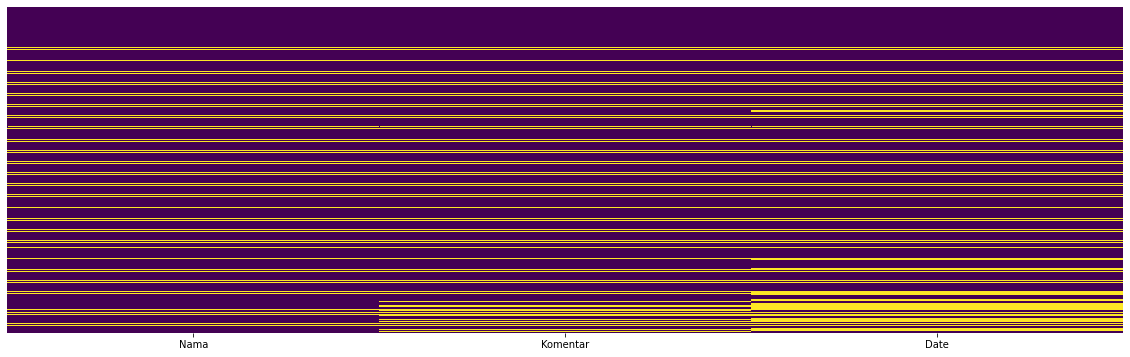

In [3]:
# Menampilkan data2 yang tidak lengkap

plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

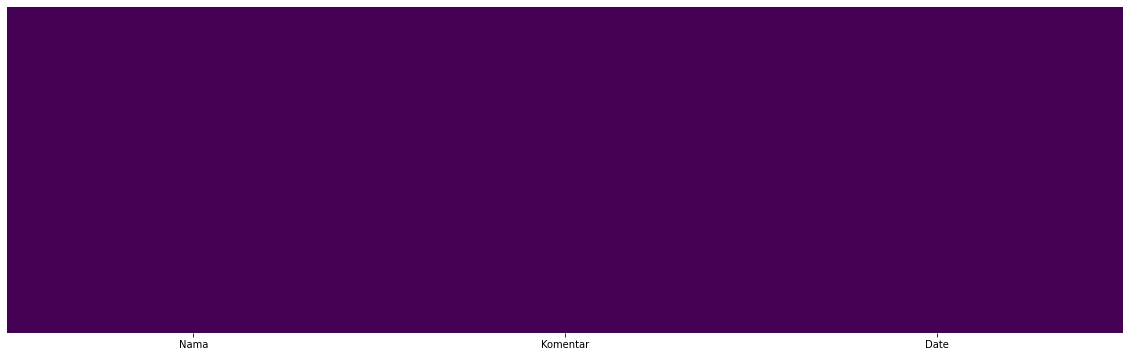

In [4]:
# Menghapus data2 yang tidak lengkap

df.dropna(inplace=True)
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
Komentar = df['Komentar']
Komentar

0       If I am allowed to replace the first person to...
1       Corona goes away fast, short of breath I wear ...
2       First, don't take care of people who are starv...
3       Give it to those who have the corona virus in ...
4       I want to be forced to do it, anyway for our g...
                              ...                        
2125    Assalamualaikum If You Need Loans For: Busines...
2126    I'm a health worker at a pharmacy, but when th...
2127    Love.. people's money is hard, not covid trs.....
2128    I just need a trusted leader, not copy-copying...
2129                                 Want to ask for help
Name: Komentar, Length: 1638, dtype: object

In [11]:
translator = Translator()
df['translate_En'] = df['Komentar'].apply(translator.translate, src='id', dest='en')
df['translate_En'] = df['translate_En'].apply(getattr, args=('text',))
df['translate_En']

0       If I am allowed to replace the first person to...
1       Corona goes away fast, short of breath I wear ...
2       Don't take care of people who are starving fir...
3       Give it to those who have the corona virus in ...
4       I want to be forced to do it, anyway for our g...
                              ...                        
2125    Assalamualaikum Jika Anda Membutuhkan Dana Pin...
2126    Saya tenaga kesehatan di apotek, tp knp waktu ...
2127    Kasih..duit rakyat susah bkn covid trs....nee ...
2128    Aku hanya butuh pemimpin amanah bukan data cop...
2129                                     Mau minta tolong
Name: translate_En, Length: 1638, dtype: object

# Sentiment Analysis menggunakan library TextBlob

### Percobaan untuk memeriksa kemampuan TextBlob dalam melakukan klasifikasi sentiment

In [6]:
# Kalimat dalam bahasa Indonesia akan di translate, karena textBlob library hanya dapat memproses text berbahasa inggris

positif = "Saya suka kucing. Saya sangat menyukai kucing, kucing adalah peliharaan terbaik!"
netral = "Kucing adalah hewan peliharaan. Tetangga saya punya seekor kucing. Kucing itu bernama Bonny."
negatif = "Saya benci kucing! Kucing selalu menciptakan banyak masalah! Saya tidak mau melihat hewan itu lagi!"

positif_blob = TextBlob(positif)
tran_pstv = positif_blob.translate(from_lang='id', to='en')

netral_blob = TextBlob(netral)
tran_ntrl = netral_blob.translate(from_lang='id', to='en')

negatif_blob = TextBlob(negatif)
tran_ngtv = negatif_blob.translate(from_lang='id', to='en')

print("Kalimat Positif: ", tran_pstv.sentiment)
print("Kalimat Netral: ", tran_ntrl.sentiment)
print("Kalimat Negatif: ", tran_ngtv.sentiment)

Kalimat Positif:  Sentiment(polarity=0.6, subjectivity=0.25)
Kalimat Netral:  Sentiment(polarity=0.3, subjectivity=0.9)
Kalimat Negatif:  Sentiment(polarity=-0.65625, subjectivity=0.55)


In [8]:
tran_ngtv

TextBlob("I hate cats! Cats always create a lot of trouble! I don't want to see that animal again!")

#### Semakin tinggi polarity akan menunjukan respon yg positif

In [7]:
# Memasukkan isi komentar ke TextBlob

Komentar_blob = [TextBlob(desc) for desc in df['Komentar']]

# Menambahkan hasil ke dataframe
df['Pol'] = [b.sentiment.polarity for b in Komentar_blob]
df['Subj'] = [b.sentiment.subjectivity for b in Komentar_blob]


df

,Nama,Komentar,Date,Pol,Subj
0,Princess Mirabella,If I am allowed to replace the first person to...,11-Jan,0.296429,0.633550
1,Dimas Andrian,"Corona goes away fast, short of breath I wear ...",11-Jan,0.300000,0.500000
2,Vanessa Warouw,"First, don't take care of people who are starv...",11-Jan,0.125000,0.366667
3,Samuel Djabumir Sam,Give it to those who have the corona virus in ...,11-Jan,0.750000,0.950000
4,Puput Arisandiwa,"I want to be forced to do it, anyway for our g...",11-Jan,-0.177778,0.666667
...,...,...,...,...,...
2125,Ratna,Assalamualaikum If You Need Loans For: Busines...,Yesterday at 12:13,-0.133333,0.466667
2126,Mahadias Fadilah Setiabudi,"I'm a health worker at a pharmacy, but when th...",Yesterday at 07:34,0.000000,0.000000
2127,Nyai Iteung Iteung,"Love.. people's money is hard, not covid trs.....",Monday at 22:25,0.236111,0.547222
2128,Fendi Pendie,"I just need a trusted leader, not copy-copying...",Monday at 21:41,0.000000,0.000000


### The average value of sentiment analysis 

In [8]:
df["Pol"].mean()

0.04151872177742884

# Sentiment Analysis menggunakan VADER

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
translator = Translator()

Vader= SentimentIntensityAnalyzer()
positif = "Saya suka kucing. Saya sangat menyukai kucing, kucing adalah peliharaan terbaik!"
negatif = "Saya benci kucing! Kucing selalu menciptakan banyak masalah! Saya tidak mau melihat hewan itu lagi!"
translate_positif = translator.translate(positif)
translate_negatif = translator.translate(negatif)

positif = Vader.polarity_scores(translate_positif.text)
negatif = Vader.polarity_scores(translate_negatif.text)

print("Kalimat Positif: ", positif)
print("Kalimat Negatif: ", negatif)

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
translate_positif.text

In [10]:
#Add VADER metrics to dataframe
df['compound'] = [Vader.polarity_scores(x)['compound'] for x in df['Komentar']]
df['positif'] = [Vader.polarity_scores(x)['pos'] for x in df['Komentar']]
df['netral'] = [Vader.polarity_scores(x)['neu'] for x in df['Komentar']]
df['negatif'] = [Vader.polarity_scores(x)['neg'] for x in df['Komentar']]


df.head(4)

NameError: name 'Vader' is not defined

In [20]:
# Contoh Hasil analisa Sentiment dari kalimat yang bermakna positif 

pd.set_option("display.max_colwidth", -1)
df[['translate_En', 'compound']].head(1)

<ipython-input-20-b19ec177229f>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,translate_En,compound
0,"If I am allowed to replace the first person to be injected with the vaccine, God willing, I am willing & sincerely pleased, God willing, my body will be the victim, right, to prove that I am a child of the nation, for me, Pak Jokowi's struggle is more noble than my life, because of Pak Jokowi's struggle there is still a long way to go to a just & prosperous Indonesia, I hope Mr. Jokowi is pleased with my wishes as your people,,, amen, Robal Allah",0.9459


### Nilai rata2 dari hasil Sentiment Analisis menggunakan VADER 

In [17]:
df["compound"].mean()

0.002405616605616605